# **Project CareLens**

## Objectives
* Grasp the effects of personal and geographical aspects on the payment for healthcare insurance 
* Formulate managing models that aid in healthcare expense prediction

## Inputs
1. Dataset 
* Source: https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance/data 
* Size: Approximately 1300 rows and 7 columns 
* Format: CSV

2. Business Requirements 
* Examine how age, gender, BMI, smoking, family size and the region affect the cost 
* Provide visual aids that showcase trend patterns 
* Formulate models that reflect the expected cost of insurnace in relation to personal traits 

3. Hypothesis
* The smoking status distinctly affects the amount charged for a healthcare insurance 
* There are regional differences in the amount of the payment for healthcare services, some of which have higher payments 
* Healthcare insurance costs can be reliably forcasted using Age and BMI as variables 

4. Tools and Resources 
* Data analysis tools like Python 
* Generative AI tools for ideation and design optimisation 

## Outputs
1. Insights 
* Descriptive Analysis: Mean, median, and variance of charges depending on each attribute (age, gender, region)
* Correlation Analysis: Pearson correlation to find relationships between features and charges.
* Regression Model:Linear regression and decision trees to predict charges 

2. Visualisations 
* Impact of Region: Heatmap or Bar chart showing average charges by region
* Effect of Smoking: Box Plot or bar chart of comparison between smoking and non-smoking insurnace cost 
* Predictive Analysis: Scatter plot indicating the accuracy of the prediction

3. Actionable Recommendations  
* Employ more sophifiscated models 
* AI tools helped exploit opportunities in code optimisation and visualising concept 

4. Ethical Deliverables 
* Data Privacy: Nonsensitive personal data is not present in the dataset but ethical considerations were taken into account regarding the anonymizing of any ground-truth data
* Bias and Fairness: Made sure that the analysis did not discriminate among genders or regions in favour of any. Bias was avoided by providing an equal respresentation of all the categories in the dataset
* The dataset was obtained from Kaggle, therefore properly anonymised and handled 


## Additional Comments

1. Limitation: 
 * Small sample size may restrict the capacity of prediction generalisation 
 * Data quality problems,e.g., missing values, may have an impact when tackling model accuracies




---

# Data Extraction, Transformation and Loading (ETL)

# Extract 
* Download the dataset 
* Choose a suitable library to read the data 

In [175]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

**Change Working Directory**

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [176]:
import os #import the os module 
current_dir = "/workspace/chang818/health_insurance.csv" #path to the uploaded dataset

current_dir = os.getcwd() #example of getting the current working directory 
os.chdir(os.path.dirname(current_dir)) #change to the directory containing the current one 
print( "You set a new current directory")

You set a new current directory


**Confirm the new current directory**

In [177]:
current_dir = os.getcwd()
current_dir

'/'

**Load the CSV File**

In [178]:
current_dir = "/workspace/chang818/health_insurance.csv"  #file location
health_i = pd.read_csv(current_dir)

print(health_i.head()) #display first few rows 

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


# Transform

**Basic Exploration**

In [179]:
print(health_i.describe()) #summary statistics 

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [180]:
print(health_i.dtypes) #data type of each column 

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


**Data Cleaning**

In [181]:
print(health_i.isnull().sum()) #check missing values 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [182]:
print(health_i.duplicated().sum()) #check for duplicate 

health_i= health_i.drop_duplicates() #remove duplicates 

1


Data cleaned successfully


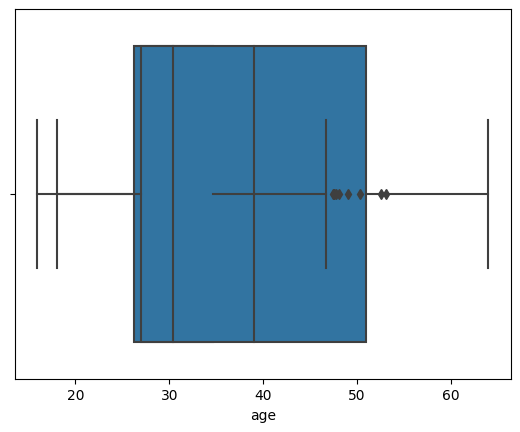

In [183]:
sns.boxplot(x=health_i['bmi']) #visualise outliers 
sns.boxplot(x=health_i['age'])

Q1 = health_i['bmi'].quantile(0.25) #remove outliers in bmi using IQR
Q3 = health_i['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
health_i= health_i[(health_i['bmi']>= lower_bound) & (health_i['bmi']<= upper_bound)] #filter outliers

print("Data cleaned successfully")

**Data Transformation**
* Encode the relevent features including sex, smoker and region 

In [184]:
#Encode categorical columns using one-hot encoding
health_i = pd.get_dummies(health_i, columns= ['sex', 'smoker', 'region'], drop_first=True)

#Apply log transformation to 'charges' to reduce skewness
health_i['log_charges'] = np.log(health_i['charges'] + 1) # add 1 to avoid log(0)

print(health_i[['charges', 'log_charges']].head()) #check transformation 

       charges  log_charges
0  16884.92400     9.734236
1   1725.55230     7.453882
2   4449.46200     8.400763
3  21984.47061     9.998137
4   3866.85520     8.260455


In [185]:
# renaming for ease and better layout 
health_i.rename(columns={'bmi': 'BMI', 'children' : 'Dependents', 'age' : 'Age', 'sex': 'Sex', 'gender' : 'Gender', 'charges' : 'Charges'}, inplace= True)

* New features 

BMI Categories

In [186]:
# Define BMI categories
bmi_bins = [0, 18.5, 24.9, 29.9, np.inf]  # Standard BMI ranges
bmi_labels = ['Underweight', 'Normal weight', 'Overweight', 'Obese']
health_i['bmi_category'] = pd.cut(health_i['BMI'], bins=bmi_bins, labels=bmi_labels)

# Check the new column
print(health_i[['BMI', 'bmi_category']].head())

      BMI   bmi_category
0  27.900     Overweight
1  33.770          Obese
2  33.000          Obese
3  22.705  Normal weight
4  28.880     Overweight


Age Groups

In [187]:
# Define age groups
age_bins = [0, 18, 35, 50, 65, np.inf]  # Define age ranges
age_labels = ['Child', 'Young Adult', 'Adult', 'Middle Aged', 'Senior']
health_i['age_group'] = pd.cut(health_i['Age'], bins=age_bins, labels=age_labels)

# Check the new column
print(health_i[['Age', 'age_group']].head())

   Age    age_group
0   19  Young Adult
1   18        Child
2   28  Young Adult
3   33  Young Adult
4   32  Young Adult


Region Category 

In [188]:
print(health_i.head())

   Age     BMI  Dependents      Charges  sex_male  smoker_yes  \
0   19  27.900           0  16884.92400         0           1   
1   18  33.770           1   1725.55230         1           0   
2   28  33.000           3   4449.46200         1           0   
3   33  22.705           0  21984.47061         1           0   
4   32  28.880           0   3866.85520         1           0   

   region_northwest  region_southeast  region_southwest  log_charges  \
0                 0                 0                 1     9.734236   
1                 0                 1                 0     7.453882   
2                 0                 1                 0     8.400763   
3                 1                 0                 0     9.998137   
4                 1                 0                 0     8.260455   

    bmi_category    age_group  
0     Overweight  Young Adult  
1          Obese        Child  
2          Obese  Young Adult  
3  Normal weight  Young Adult  
4     Overweight

In [189]:
def get_region(row):
    if row['region_northwest'] == 1:
        return 'northwest'
    elif row['region_southeast'] == 1:
        return 'southeast'
    elif row['region_southwest'] == 1:
        return 'southwest'
    else:
        return 'northeast'  # Assuming the fourth region not encoded is 'northeast'

health_i['region'] = health_i.apply(get_region, axis=1)

In [190]:
# Example: Grouping regions into North and South
region_map = {
    'northeast': 'North_East',
    'northwest': 'North_West',
    'southeast': 'South_East',
    'southwest': 'South_West'
}
health_i['region_group'] = health_i['region'].map(region_map)

# Check the new column
print(health_i[['region', 'region_group']].head())

      region region_group
0  southwest   South_West
1  southeast   South_East
2  southeast   South_East
3  northwest   North_West
4  northwest   North_West


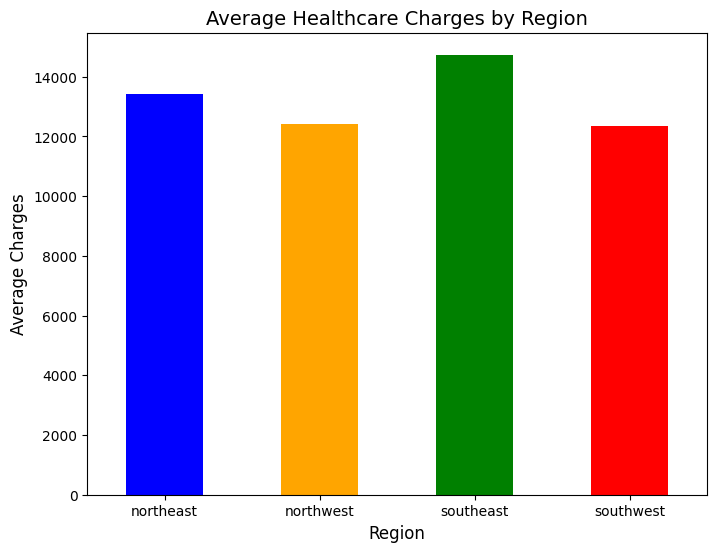

In [191]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/workspace/chang818/health_insurance.csv')

# Group data by region and calculate the average charges
avg_charges_by_region = data.groupby('region')['charges'].mean()

# Create a bar graph
plt.figure(figsize=(8, 6))
avg_charges_by_region.plot(kind='bar', color=['blue', 'orange', 'green', 'red'])

# Add titles and labels
plt.title('Average Healthcare Charges by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Average Charges', fontsize=12)
plt.xticks(rotation=0)

# display the plot 
plt.show()

# Visualisations

Analysis techniques used:
* Descriptive 
* Correlation
* Predictive 

1. Impact of Region: 
* Heatmap for Average Charges by Region

2. Effects of Smoking:
* Boxplot comparing Insurance cost for smokers and non-smokers 

3. Predictive Analysis:
* Scatter Plot for Predicted vs Actual Healthcare Charges 

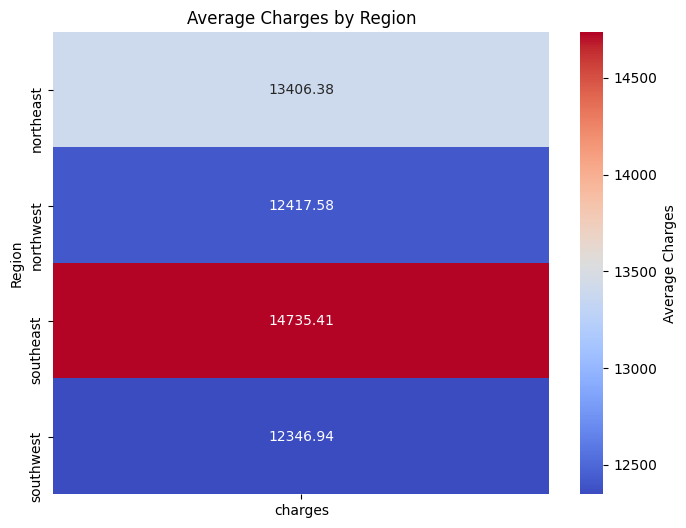

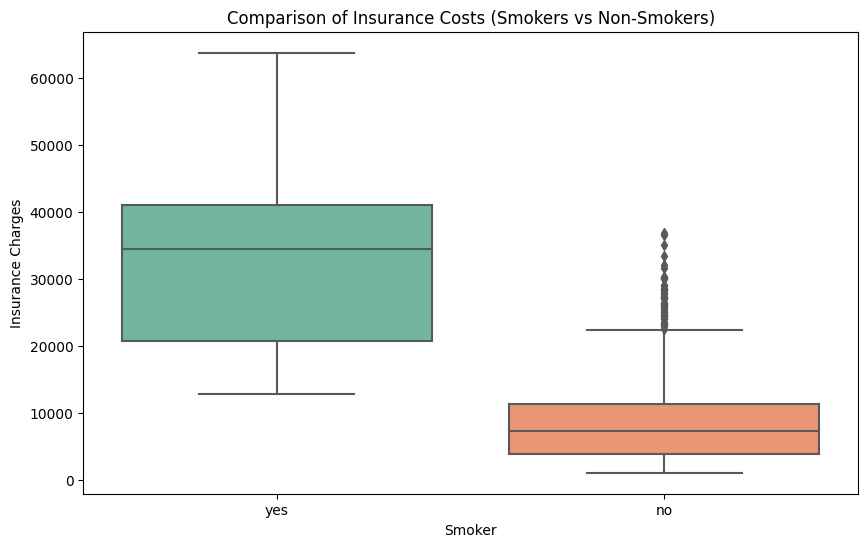

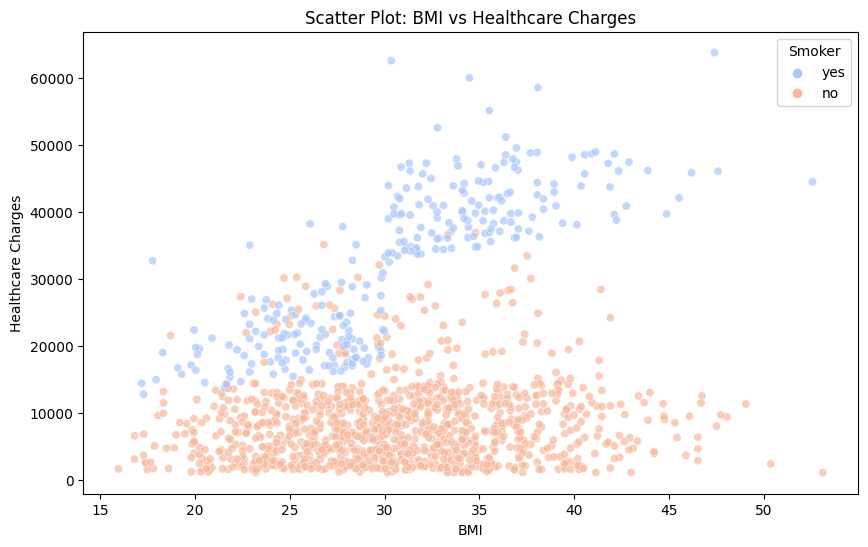

In [192]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/workspace/chang818/health_insurance.csv'  # Update the file path
data = pd.read_csv(file_path)

# 1. Heatmap: Average charges by region
avg_charges_by_region = data.groupby('region')['charges'].mean().reset_index()
avg_charges_pivot = avg_charges_by_region.pivot_table(values='charges', index='region', aggfunc='mean')

plt.figure(figsize=(8, 6))
sns.heatmap(avg_charges_pivot, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Average Charges'})
plt.title('Average Charges by Region')
plt.ylabel('Region')
plt.xlabel('')
plt.show()

# 2. Boxplot: Comparing smokers vs non-smokers insurance costs
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=data, palette="Set2")
plt.title('Comparison of Insurance Costs (Smokers vs Non-Smokers)')
plt.xlabel('Smoker')
plt.ylabel('Insurance Charges')
plt.show()

# 3. Scatter Plot: Predictions visualisation for healthcare charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['bmi'], y=data['charges'], hue=data['smoker'], alpha=0.7, palette='coolwarm')
plt.title('Scatter Plot: BMI vs Healthcare Charges')
plt.xlabel('BMI')
plt.ylabel('Healthcare Charges')
plt.legend(title='Smoker')
plt.show()

# the following visualisation code was adapted with assistance from OpenAi's ChatGPT 
# it generates a heatmap, box plot, and scatter plot for healthcare insurance charge analysis

---

# Resources 

1. With a little help from OpenAI's ChatGPT, the Python code for this project’s data visualizations—featuring heatmaps, box plots, and scatter plots—came to life. The project taps into widely-used libraries like pandas, seaborn, and matplotlib to break down and illustrate healthcare insurance data effectively.
2. Code Institute - LMS https://learn.codeinstitute.net/ci_program/daai_2 for indepth explanation for things i did not understand
3. https://github.com/adam-p/markdown-here/wiki/markdown-cheatsheet To structure my Notebook 

# Conclusion 

In conclusion, this project revealed several important insights about healthcare costs. Smokers incur significantly higher healthcare expenses compared to non-smokers, largely due to smoking-related health issues such as cardiovascular diseases, respiratory conditions, and cancer. Reducing smoking rates through various programmes could substantially lower healthcare costs for individuals and insurers alike.

Regional differences in healthcare costs are evident, with regions like the Northeast experiencing higher charges compared to the Southwest. These variations may be influenced by factors such as healthcare access, income levels, and differing health risk profiles. Addressing these disparities requires a closer look at regional healthcare policies and demographics, with a focus on allocating resources to high-cost regions.

The analysis also showed that healthcare costs increase with age and BMI. Older individuals and those with higher BMI values face higher healthcare expenses due to age-related health issues and conditions such as diabetes and hypertension. Promoting preventive care and wellness programmes targeted at these populations could help reduce long-term healthcare costs.

Lastly, the impact of children and gender on healthcare costs was found to be minimal. The number of children in a family and gender do not significantly affect individual healthcare expenses compared to factors like smoking, region, age, and BMI.

Overall, the visualisations, including heatmaps, boxplots, and scatter plots, effectively highlighted these findings and provided a clear understanding of the factors influencing healthcare costs. These insights can inform policies and initiatives aimed at managing and reducing healthcare expenses.

# Create File Folder 

In [193]:
import os
try:
  # create your folder here
  # os.makedirs(name='CareLens')
except Exception as e:
  print(e)


IndentationError: expected an indented block (1029335299.py, line 5)